In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.metrics import mean_squared_error
# from sklearn.datasets import make_regression
# from my_ml_lib.supervised_learning.regression import LinearRegression, RidgeRegression, LassoRegression, PolynomialRegression

# data = pd.read_csv(r"C:\Users\wifi\Downloads\Advertising.csv")
# data=data.drop(["Unnamed: 0", "Radio", "Newspaper"], axis=1)
# X, y = make_regression(n_samples=1000,n_features=2,noise=1, random_state=42)
# x_col = [row[0] for row in X]
# y_col = [row[1] for row in X]

# x_mean = np.mean(x_col)
# y_mean = np.mean(y_col)

# numerator = sum((x - x_mean) * (y - y_mean) for x, y in zip(x_col, y_col))
# denominator = sum((x - x_mean)**2 for x in x_col)

# w1 = numerator / denominator

# print(w1)

# w0 = y_mean - (w1 * x_mean)

# print(w0)
# # Generate regression line
# y_pred = [w0 + w1 * x for x in x_col]

# RSS = sum((y-y_pred)**2 for y_pred, y in zip(y_col,y_pred))
# MSE = RSS/len(X)

# # Plot data points
# plt.scatter(x_col, y_col, color='blue', label='Data points')

# # Plot regression line
# plt.plot(x_col, y_pred, color='red', linestyle='--', label=f'Linear Regression: y = {w0:.2f} + {w1:.2f}x')

# # Labels and title
# plt.xlabel('TV')
# plt.ylabel('Sales')
# plt.title('Linear Regression Fit')
# plt.legend()
# plt.grid(True)

# # Show plot
# plt.show()
# X.shape[0]
# def gradient_descent(lr, X, y, epochs=1000):
#     weights = np.zeros(X.shape[1])
#     bias = 0.0
#     for epoch in range(epochs):
#         # Predict values
#         y_pred = np.dot(X, weights) + bias

#         # Compute the error
#         error = y - y_pred

#         # Compute gradients
#         db = -2 * np.sum(error) / X.shape[0]
#         dw = -2 * np.dot(X.T,error) / X.shape[0]

#         # Update weights
#         weights = weights - lr * dw
#         bias = bias - lr * db

#         # Optional: Print debugging information every 100 epochs
#         if epoch % 100 == 0:
#             mse = np.mean(error**2)  # Mean Squared Error
#             # print(f"Epoch {epoch}: weights = {weights:.4f}, bias = {bias:.4f}, MSE = {mse:.4f}")

#     return weights, bias
# weights, bias = gradient_descent(lr = 0.001, X = X, y = y)
# y_pred = np.dot(X, weights) + bias

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression, fetch_california_housing
from ScratchML.supervised_learning.regression import LinearRegression, RidgeRegression, LassoRegression, PolynomialRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from ScratchML.supervised_learning.k_nearest_neighbors import KNN

In [22]:
data = fetch_california_housing()
X,y = data.data, data.target
feature_names = data.feature_names

In [9]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
y_pred_lin = linear_model.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lin))

Linear Regression MSE: 0.5558915986668407


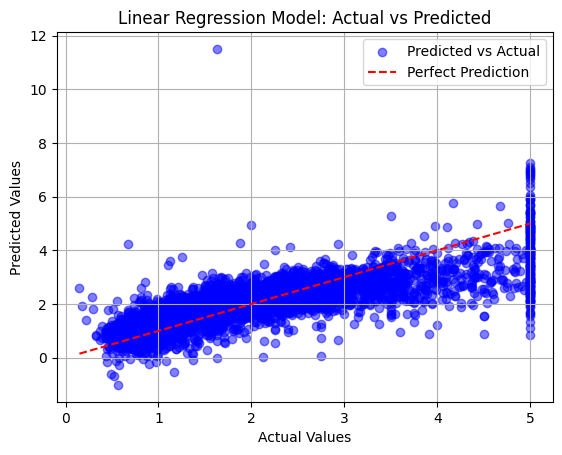

In [23]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_lin, alpha=0.5, color='blue', label='Predicted vs Actual')

# Plot the diagonal line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Model: Actual vs Predicted')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [24]:
ridge_model = RidgeRegression(lambda_=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred_ridge))

Ridge Regression MSE: 0.5558034669574033


In [26]:
lasso_model = LassoRegression(lambda_=1.0)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

c:\Users\wifi\Documents\Building Models from Scratch\ScratchML\supervised_learning\regression.py:186: RuntimeWarning: overflow encountered in matmul
  gradient = (1/X.shape[0]) * (X.T @ (X @ self.theta - y))
c:\Users\wifi\Documents\Building Models from Scratch\ScratchML\supervised_learning\regression.py:189: RuntimeWarning: invalid value encountered in subtract
  self.theta -= learning_rate * gradient


In [28]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [29]:
poly_reg = PolynomialRegression()
poly_reg.fit(X_poly_train, y_train)
y_pred_poly = poly_reg.predict(X_poly_test)
print("Polynomial Regression (degree=2) MSE:", mean_squared_error(y_test, y_pred_poly))

Polynomial Regression (degree=2) MSE: 1.895470494218402


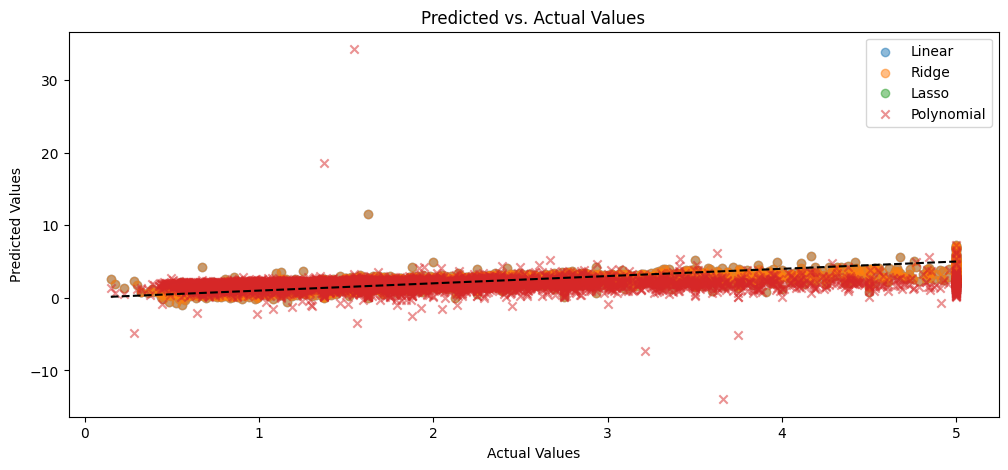

In [30]:
# ---------------- PLOTTING ----------------
# 1. Scatter plot of actual vs. predicted values for all models
plt.figure(figsize=(12, 5))
plt.scatter(y_test, y_pred_lin, label="Linear", alpha=0.5)
plt.scatter(y_test, y_pred_ridge, label="Ridge", alpha=0.5)
plt.scatter(y_test, y_pred_lasso, label="Lasso", alpha=0.5)
plt.scatter(y_test, y_pred_poly, label="Polynomial", alpha=0.5, marker="x")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='dashed')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.legend()
plt.show()


In [23]:
neigh = KNN(k = 3)
neigh.fit(X_train,y_train)
